**Inverse Interpolation**

In [1]:
f(x)=exp(x)-1/x

f (generic function with 1 method)

In [2]:
using Plots

In [3]:
xs=[0.25:0.01:1;];

In [6]:
ys=f.(xs);

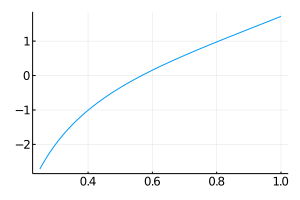

In [9]:
plot(xs,ys,size=[300,200],legend=false)

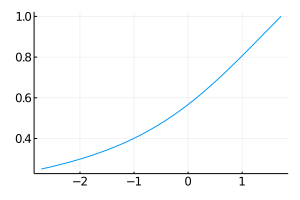

In [10]:
plot(ys,xs,size=[300,200],legend=false)

Create the points $(x_i,y_i)$ where $y_i=f^{-1}(x_i)$ by simply
choosing the $y_i$ first and then setting $x_i=f(y_i)$.

In [30]:
y=[0.3:0.2:1;]

4-element Array{Float64,1}:
 0.3
 0.5
 0.7
 0.9

In [31]:
x=f.(y)

4-element Array{Float64,1}:
 -1.9834745257573303
 -0.3512787292998718
  0.585181278899048
  1.3484920000458387

Interpolate the points $(x_i,y_i)$ for the inverse function $f^{-1}(x)$ with a Lagrange interpolating polynomial.

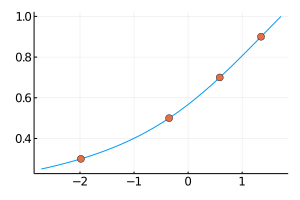

In [14]:
scatter!(x,y)

In [15]:
function l(j,t)
    r=1.0
    for i=1:n
        if i != j
            r=r*(t-x[i])/(x[j]-x[i])
        end
    end
    return r
end

l (generic function with 1 method)

In [16]:
function p(t)
    r=0.0
    for j=1:n
        r=r+y[j]*l(j,t)
    end
    return r
end

p (generic function with 1 method)

In [18]:
n=length(y)

4

In [19]:
zs=p.(ys);

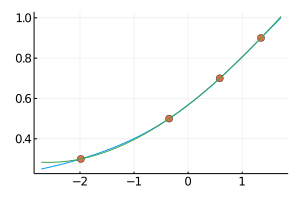

In [20]:
plot!(ys,zs)

In [21]:
alpha=p(0)

0.5685865238426943

This finishes the inverse interpolation for finding a root to $f(x)=0$ by approximating it as $\alpha=p(0)$.

In [22]:
f(alpha)

0.007022137670756878

That's not a bad approximation (maybe) but it can be improved
using the ideas in Chapter 8.  That is, by iterating.

In [32]:
y'

1×4 LinearAlgebra.Adjoint{Float64,Array{Float64,1}}:
 0.3  0.5  0.7  0.9

In [33]:
x'

1×4 LinearAlgebra.Adjoint{Float64,Array{Float64,1}}:
 -1.98347  -0.351279  0.585181  1.34849

In [34]:
y[1]=alpha;
x[1]=f(alpha);

In [35]:
y'

1×4 LinearAlgebra.Adjoint{Float64,Array{Float64,1}}:
 0.568587  0.5  0.7  0.9

In [36]:
x'

1×4 LinearAlgebra.Adjoint{Float64,Array{Float64,1}}:
 0.00702214  -0.351279  0.585181  1.34849

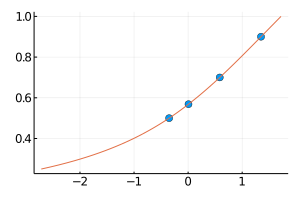

In [41]:
scatter(x,y,size=[300,200],legend=false)
plot!(ys,xs)

In [42]:
z2s=p.(ys);

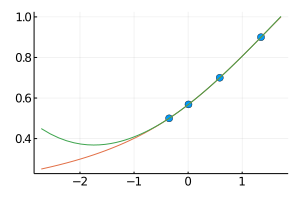

In [43]:
plot!(ys,z2s)

In [44]:
alpha2=p(0)

0.567137284261565

In [45]:
alpha

0.5685865238426943

In [46]:
f(alpha2)

-2.9263186749783898e-5

The new approximation $\alpha_2$ satisfies $f(\alpha_2)\approx 0$ better than the previous approximation.

In [48]:
y[4]=alpha2;
x[4]=f(alpha2);

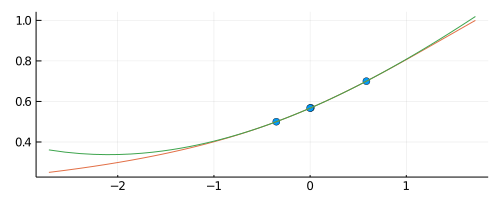

In [50]:
scatter(x,y,size=[500,200],legend=false)
plot!(ys,xs)
z3s=p.(ys);
plot!(ys,z3s)

In [51]:
alpha3=p(0)

0.5671432905562412

In [52]:
alpha2

0.567137284261565

In [53]:
alpha

0.5685865238426943

In [54]:
f(alpha3)

7.135663171453643e-10

Since the residual when I plug $\alpha_3$ into $f$ is so small,
I conclude that $\alpha_3$ is a good approximation of the root.

Next thing to do is to automate this so the values of $x_i$ and $y_i$ are replaced in the sequence $i=1,2,3,4,1,2,3,4,\ldots$.